# Matplotlib Bar Charts and Anaylzing Data from csv

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

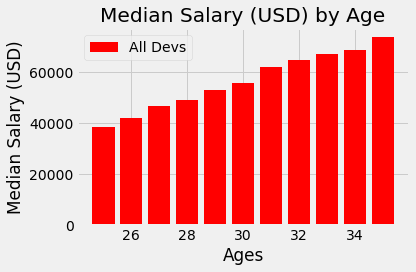

In [7]:
plt.style.use("fivethirtyeight")

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(ages_x, dev_y, color="red", label="All Devs")
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

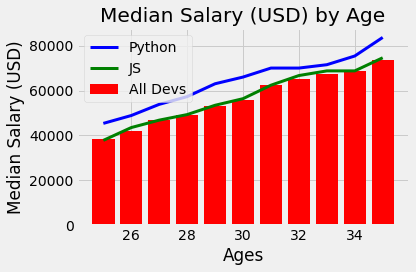

In [12]:
plt.plot(ages_x, py_dev_y, label="Python", color="b", lw=3) 
plt.plot(ages_x, js_dev_y, label="JS", color="g", lw=3)
plt.bar(ages_x, dev_y, color="red", label="All Devs")
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.legend()
plt.tight_layout()
plt.show()

All Bars in Matplotlib

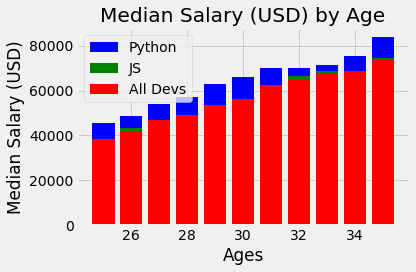

In [14]:
plt.style.use("fivethirtyeight")
plt.bar(ages_x, py_dev_y, label="Python", color="b") 
plt.bar(ages_x, js_dev_y, label="JS", color="g")
plt.bar(ages_x, dev_y, color="red", label="All Devs")
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.legend()
plt.tight_layout()
plt.show()

But these bars are overlapping with each other

In [15]:
import numpy as np

In [16]:
x_indexes = np.arange(len(ages_x))
x_indexes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
# setting width for each bars
width = 0.25

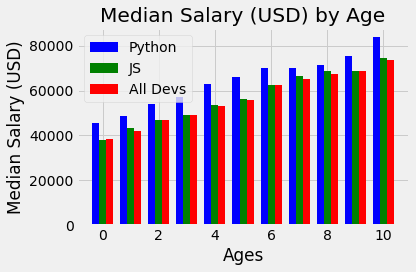

In [26]:
plt.style.use("fivethirtyeight")
plt.bar(x_indexes - width, py_dev_y, width=width, label="Python", color="b") 
plt.bar(x_indexes, js_dev_y, width=width, label="JS", color="g")
plt.bar(x_indexes + width, dev_y, width=width, color="red", label="All Devs")
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.legend()
plt.tight_layout()
plt.show()

But on the x-axis, we are not having ages_x, but we have our x_indexes, we need to fix it.

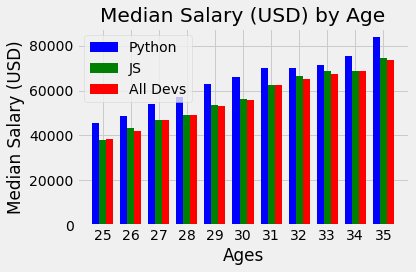

In [29]:
plt.style.use("fivethirtyeight")
plt.bar(x_indexes - width, py_dev_y, width=width, label="Python", color="b") 
plt.bar(x_indexes, js_dev_y, width=width, label="JS", color="g")
plt.bar(x_indexes + width, dev_y, width=width, color="red", label="All Devs")
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
# this fixes that problem
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.legend()
plt.tight_layout()
plt.show()

# Example of CSV file

In [30]:
import csv

In [32]:
with open("data/data.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    # to fetch first row of the csv file
    row = next(csv_reader)
    print(row['LanguagesWorkedWith'].split(';'))

['HTML/CSS', 'Java', 'JavaScript', 'Python']


In [33]:
from collections import Counter

# Example to explain further process

In [36]:
c = Counter(["Python", "JavaScript"])
c                                                # counting the nos. of languages from the list of data

Counter({'Python': 1, 'JavaScript': 1})

In [37]:
c.update(["C++", "Python"])

In [38]:
c

Counter({'Python': 2, 'JavaScript': 1, 'C++': 1})

Now as we can see, we have records of the languages in the counter which counts all of it.

same method we can apply for next process...


In [40]:
with open("data/data.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    # setting counter to count all the languages of each row
    language_counter = Counter()
    
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
print(language_counter)        # it has total languages counted over in dictionary form

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [41]:
with open("data/data.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    # setting counter to count all the languages of each row
    language_counter = Counter()
    
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
print(language_counter.most_common(15))        # it has most common languages (top languages- more counts)

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Now lastly we need to split languages and counts to show over x and y axis

In [43]:
with open("data/data.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    # setting counter to count all the languages of each row
    language_counter = Counter()
    
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
languages = []
popularity = []
        
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

In [44]:
# Now we have two different lists to craete our bar graph
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


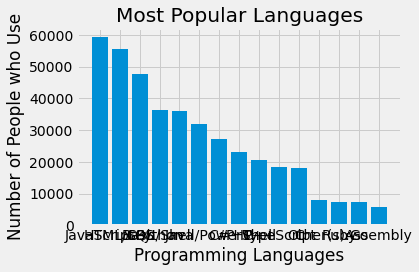

In [46]:
plt.style.use("fivethirtyeight")
plt.bar(languages, popularity)
plt.title("Most Popular Languages")
plt.xlabel("Programming Languages")
plt.ylabel("Number of People who Use")
plt.tight_layout()
plt.show()

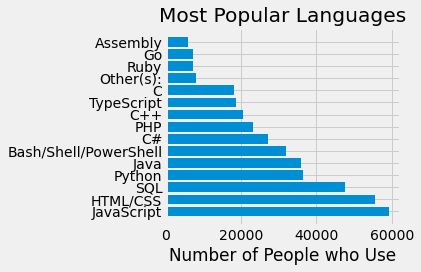

In [49]:
plt.style.use("fivethirtyeight")

# horizontal bar chart - barh
plt.barh(languages, popularity)
plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People who Use")
plt.tight_layout()
plt.show()

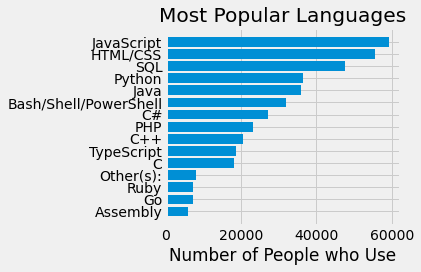

In [50]:
plt.style.use("fivethirtyeight")

# putting top languages at the top of the graph
languages.reverse()
popularity.reverse()
# horizontal bar chart - barh
plt.barh(languages, popularity)
plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People who Use")
plt.tight_layout()
plt.show()

# Pandas Method to do the same

In [51]:
import pandas as pd

In [52]:
data = pd.read_csv("data/data.csv")

In [54]:
ids = data["Responder_id"]
lang_responses = data["LanguagesWorkedWith"]

In [62]:
ids

0            1
1            2
2            3
3            4
4            5
         ...  
87564    88182
87565    88212
87566    88282
87567    88377
87568    88863
Name: Responder_id, Length: 87569, dtype: int64

In [63]:
lang_responses

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
87564                             HTML/CSS;Java;JavaScript
87565                           HTML/CSS;JavaScript;Python
87566    Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567                        HTML/CSS;JavaScript;Other(s):
87568    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguagesWorkedWith, Length: 87569, dtype: object

In [57]:
language_counters = Counter()

In [59]:
for response in lang_responses:
    language_counters.update(response.split(';'))

In [64]:
language_counters

Counter({'HTML/CSS': 110932,
         'Java': 71834,
         'JavaScript': 118438,
         'Python': 72886,
         'C++': 41048,
         'C': 36034,
         'C#': 54194,
         'SQL': 95088,
         'VBA': 9562,
         'R': 10096,
         'Bash/Shell/PowerShell': 63982,
         'Ruby': 14662,
         'Rust': 5588,
         'TypeScript': 37046,
         'WebAssembly': 2030,
         'Other(s):': 15840,
         'Go': 14402,
         'PHP': 46060,
         'Assembly': 11666,
         'Kotlin': 11240,
         'Swift': 11488,
         'Objective-C': 8382,
         'Elixir': 2520,
         'Erlang': 1554,
         'Clojure': 2508,
         'F#': 1946,
         'Scala': 6618,
         'Dart': 3366})

In [65]:
all_languages = []
counts = []
        
for item in language_counters.most_common(15):
    all_languages.append(item[0])
    counts.append(item[1])

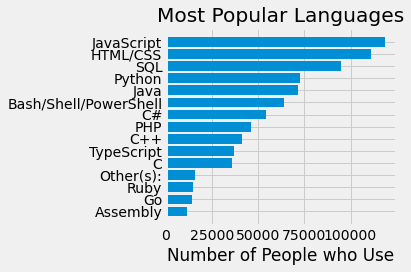

In [66]:
plt.style.use("fivethirtyeight")

# putting top languages at the top of the graph
all_languages.reverse()
counts.reverse()
# horizontal bar chart - barh
plt.barh(all_languages, counts)
plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People who Use")
plt.tight_layout()
plt.show()